In [1]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs
import configs
import pandas as pd
import seaborn as sns

device = 'cpu'

/Users/chingfang/Code/sr-project/datasets/inputs.py:12: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")


In [2]:
trained_dir = f'{configs.engram_dir}02_gamma_v_eigenvals/'

In [3]:
results_file = trained_dir + 'results.p'
with open(results_file, 'rb') as f:
    results = pickle.load(f)

In [4]:
results.keys()

dict_keys(['gammas', 'nonlinearity_args', 'eigenvals', 'steps'])

In [5]:
results['eigenvals'] = [min(e, 10) for e in results['eigenvals']]

In [6]:
df = pd.DataFrame(results)

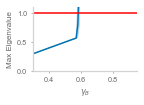

In [11]:
fig, ax = plt.subplots(figsize=(2.1,1.5))
g = sns.lineplot(
    x='gammas', y='eigenvals',
    linestyle='-', color='C0',
    data=df[
        (df['steps']==1500) &\
        (df['nonlinearity_args']=='Linear') &\
        (df['gammas'] < 0.6)
        ],
    ax=ax
)
plt.axhline(1, color='red')
plt.ylabel('Max Eigenvalue')
plt.xlabel('$\gamma_B$')
plt.ylim(0, 1.1)
plt.xlim(0.3, 0.95)
plt.tight_layout()
plt.savefig('../talk-figures/3a-part1.png', dpi=600, transparent=True)
plt.show()

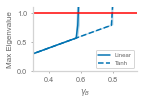

In [12]:
fig, ax = plt.subplots(figsize=(2.1,1.5))
g = sns.lineplot(
    x='gammas', y='eigenvals',
    label='Linear', linestyle='-', color='C0',
    data=df[
        (df['steps']==1500) &\
        (df['nonlinearity_args']=='Linear') &\
        (df['gammas'] < 0.6)
        ],
    ax=ax
)
g = sns.lineplot(
    x='gammas', y='eigenvals',
    label='Tanh', linestyle='--', color='C0',
    data=df[
        (df['steps']==1500) &\
        (df['nonlinearity_args']=='Tanh') &\
        (df['gammas'] < 0.81)
        ],
    ax=ax
)
g.get_legend().set_title(None)
plt.axhline(1, color='red')
plt.ylabel('Max Eigenvalue')
plt.xlabel('$\gamma_B$')
plt.ylim(0, 1.1)
plt.xlim(0.3, 0.95)
plt.tight_layout()
plt.savefig('../talk-figures/3a-part2.png', dpi=600, transparent=True)
plt.show()